In [27]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

plt.rcParams["figure.figsize"] = (12, 8)

In [28]:
# Load dataset
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [22]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.shape

(200, 5)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [25]:
df.describe().style.background_gradient(cmap = "magma")

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


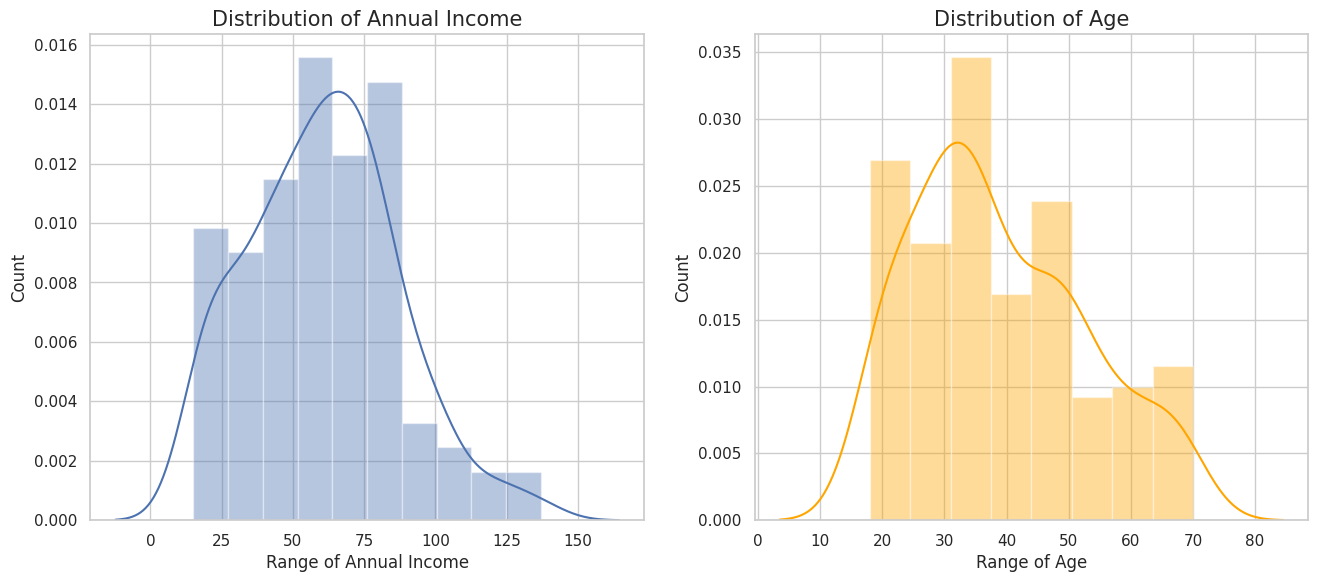

In [50]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 6)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'orange')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots,

we can infer one thing that There are few people who earn more than 100 US Dollars. Most of the people have an earning of around 50-75 US Dollars. Also, we can say that the least Income is around 20 US Dollars.

Taking inferences about the Customers.

The most regular customers for the Mall has age around 30-35 years of age. Whereas the the senior citizens age group is the least frequent visitor in the Mall. Youngsters are lesser in umber as compared to the Middle aged people.

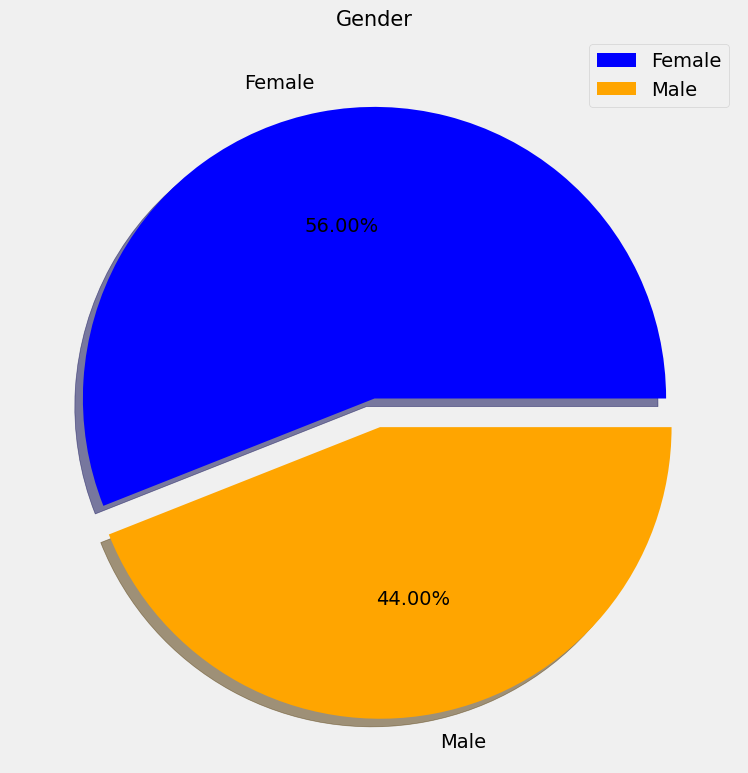

In [42]:
labels = ['Female', 'Male']
size = df['Genre'].value_counts()
colors = ['blue', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

By looking at the above pie chart which explains about the distribution of Gender in the Mall

Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

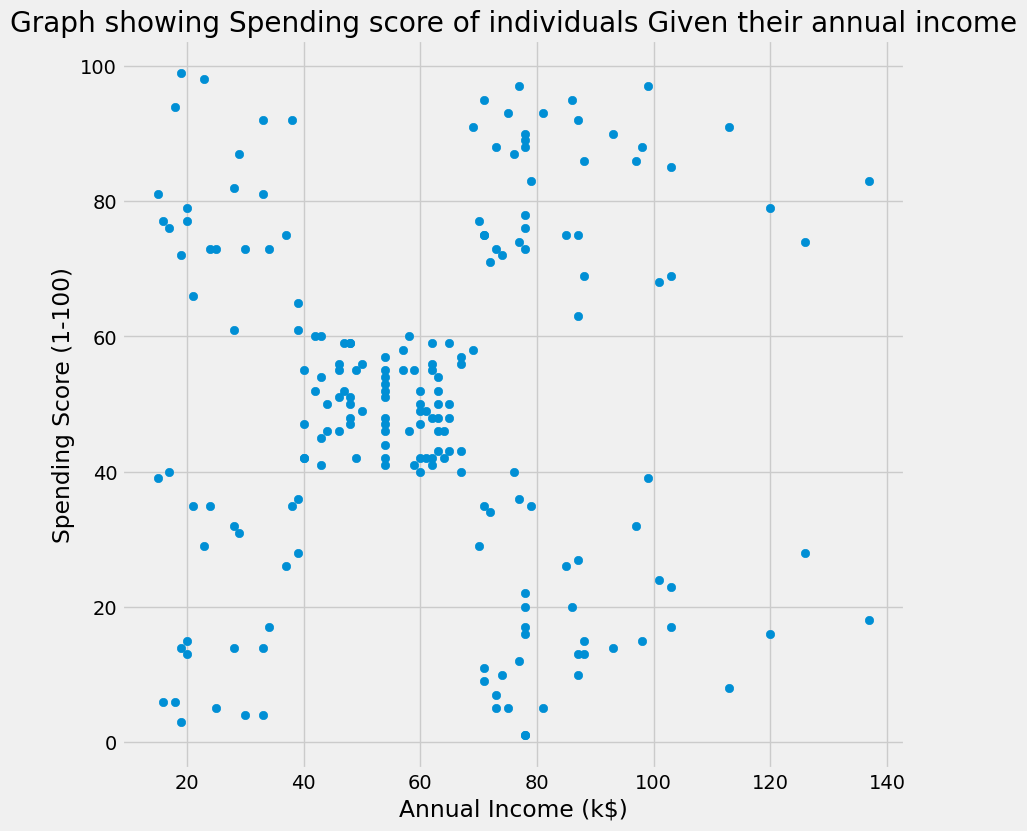

In [43]:
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Graph showing Spending score of individuals Given their annual income")
plt.show()

In [44]:
x = df.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


**The Elbow Method to find the No. of Optimal Clusters**



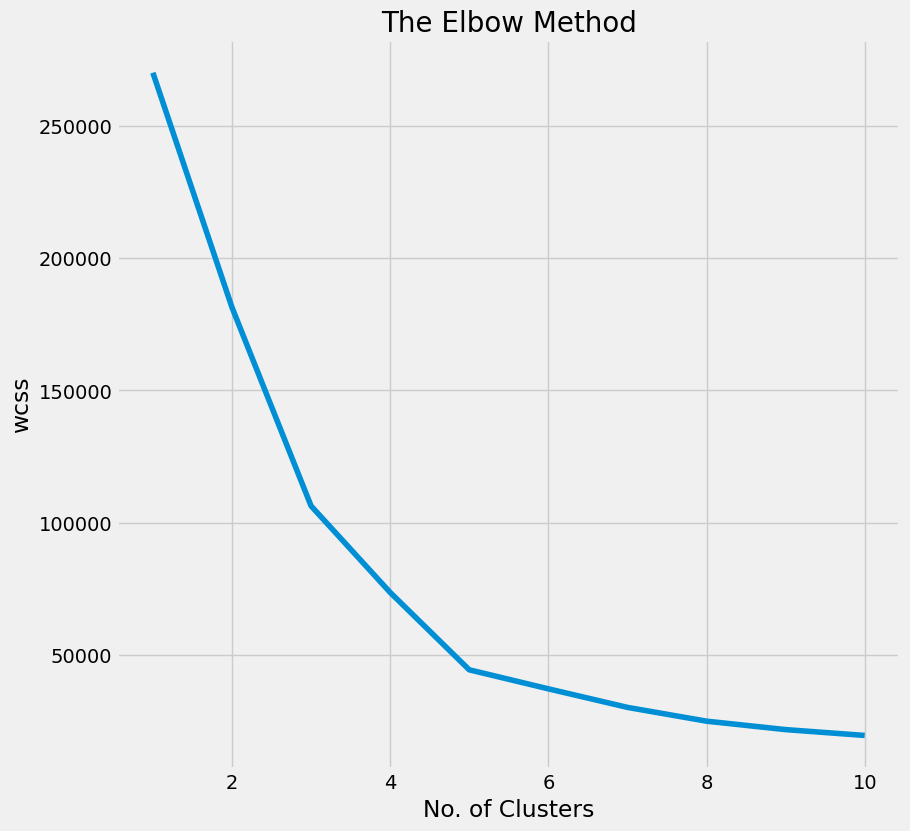

In [41]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

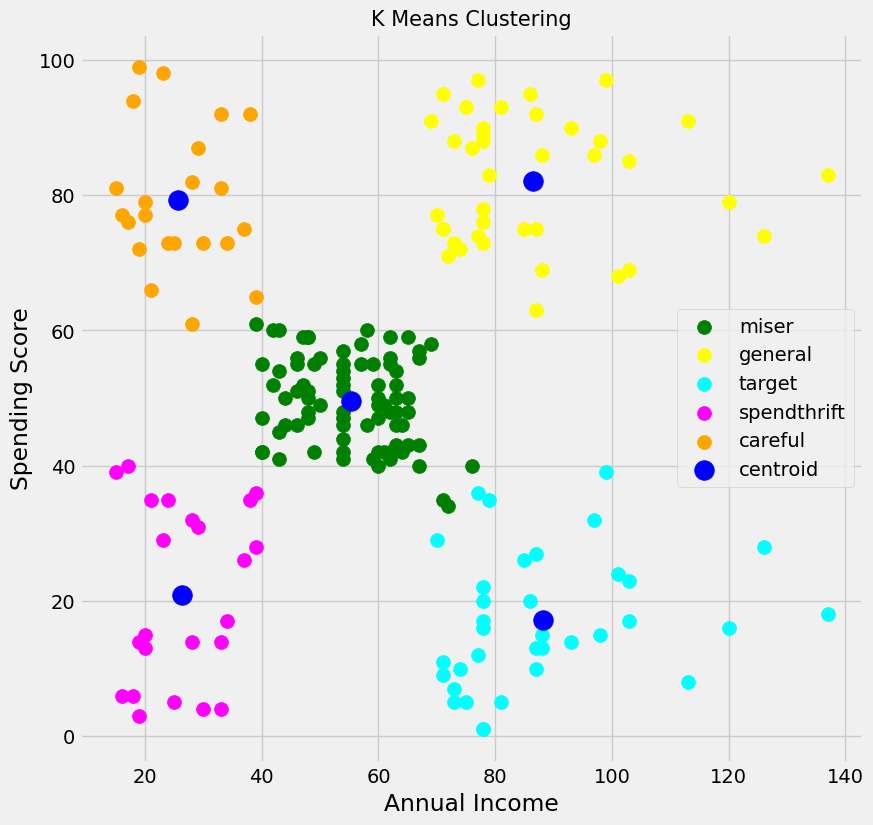

In [39]:
#Visualizaing the Clusters
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'green', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200, c = 'blue' , label = 'centroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift, Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

In [52]:
# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [53]:
# Apply K-Means
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [54]:
# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

In [55]:
# Save the model
import pickle
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)